In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from matplotlib import pyplot as plt

In [13]:
!pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)


In [15]:
!python -m venv myenv

In [14]:
!pip install opencv-python-headless

In [2]:
!pip install opencv-python-headless matplotlib numpy

In [7]:
img = cv2.imread(r'')

In [8]:
import os

# Paths to the model and image folder
model_prototxt = 'deploy.prototxt'
model_weights = 'mobilenet_iter_73000.caffemodel'
image_folder = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'

# Check if model files and image folder exist
assert os.path.exists(model_prototxt), f"Model prototxt not found at {model_prototxt}"
assert os.path.exists(model_weights), f"Model weights not found at {model_weights}"
assert os.path.exists(image_folder), f"Image folder not found at {image_folder}"

print("All paths are verified and correct!")

All paths are verified and correct!


In [9]:
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.10.0


In [10]:
import cv2

# Load the pre-trained model
net = cv2.dnn.readNetFromCaffe(model_prototxt, model_weights)
print("Model loaded successfully!")


Model loaded successfully!


In [11]:
# List available images in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('jpg', 'jpeg', 'png', 'bmp'))]
print(f"Total images found: {len(image_files)}")
print("Sample image files:", image_files[:5])


Total images found: 4613
Sample image files: ['000000000285.jpg', '000000000632.jpg', '000000000724.jpg', '000000000776.jpg', '000000000785.jpg']


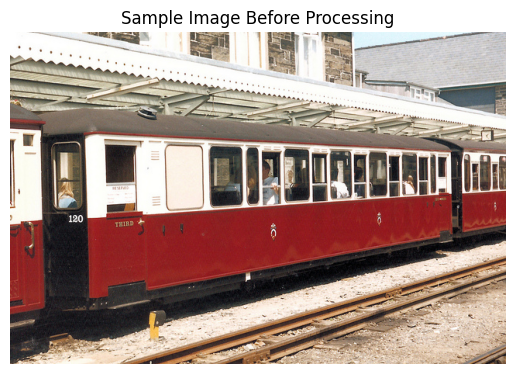

In [16]:
import cv2
import os
import random  # Import the random module
from matplotlib import pyplot as plt

# Define the folder and list of image files
image_folder = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('jpg', 'jpeg', 'png', 'bmp'))]

# Display a sample image
sample_image_path = os.path.join(image_folder, random.choice(image_files))
sample_img = cv2.imread(sample_image_path)
sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

plt.imshow(sample_img_rgb)
plt.axis('off')
plt.title("Sample Image Before Processing")
plt.show()


### image detection

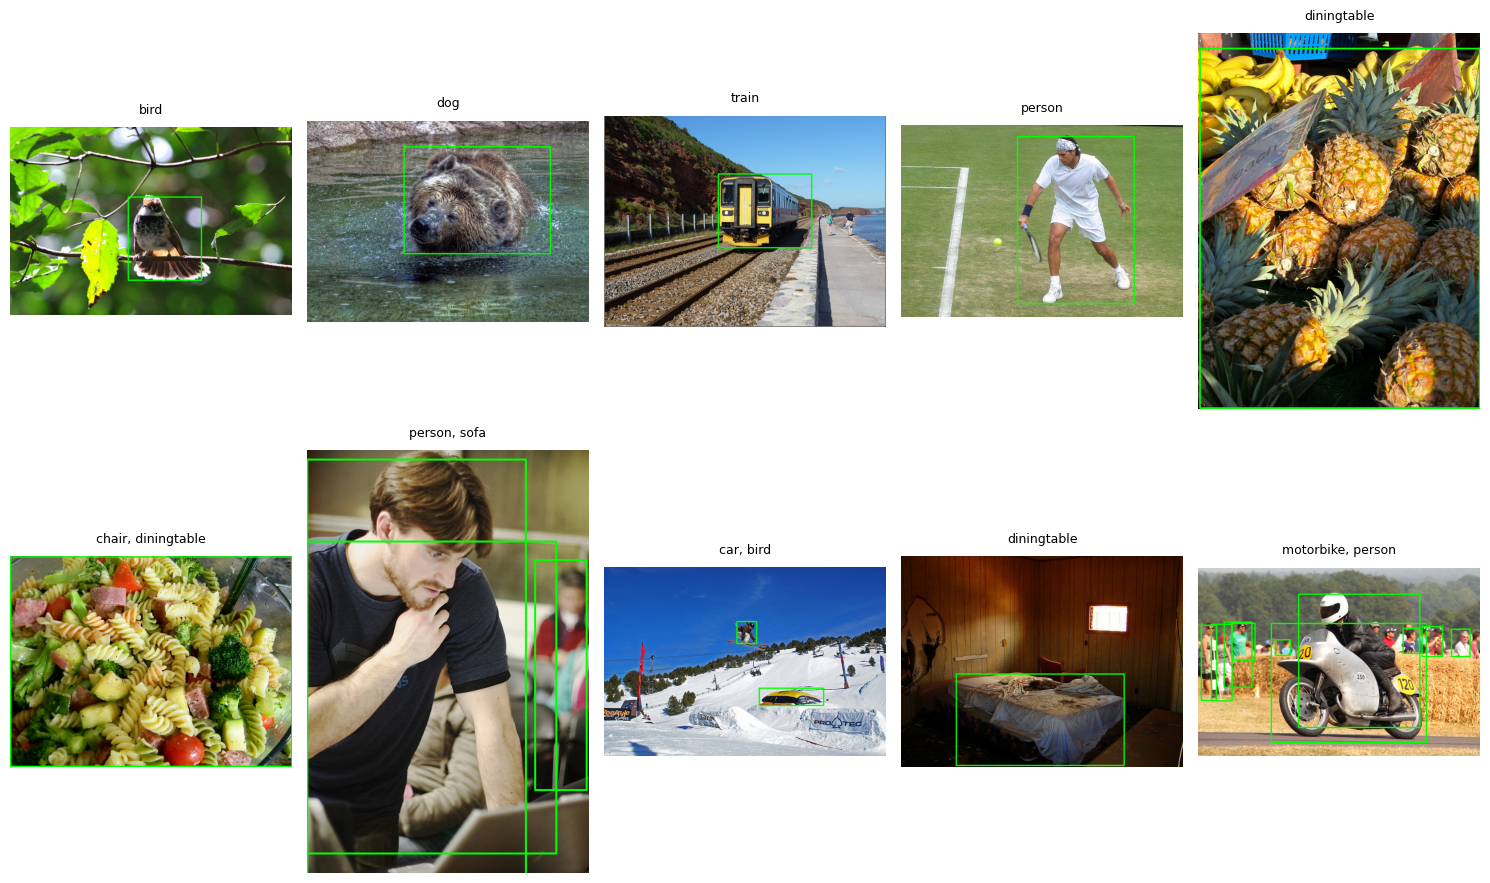

In [39]:
import cv2
import numpy as np
import os
import random
from matplotlib import pyplot as plt

# Load pre-trained MobileNet SSD model
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'mobilenet_iter_73000.caffemodel')

# Folder containing the images
image_folder = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('jpg', 'jpeg', 'png', 'bmp'))]

# Select 10 random images
random_images = random.sample(image_files, 10)

CLASSES = ['background', 'airplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow',
           'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

# Display the random 10 images with detected objects
plt.figure(figsize=(15, 10))
for idx, image_name in enumerate(random_images):
    # Load the image
    image_path = os.path.join(image_folder, image_name)
    img = cv2.imread(image_path)
    h, w = img.shape[:2]
    
    # Prepare the image for DNN model
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 0.007843, (300, 300), 127.5)
    net.setInput(blob)
    detections = net.forward()

    detected_objects = []

    # Iterate over all detections and draw bounding boxes
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.2:
            class_id = int(detections[0, 0, i, 1])
            label = CLASSES[class_id]
            if label not in detected_objects:
                detected_objects.append(label)
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display image and detected objects
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(", ".join(detected_objects) if detected_objects else "No Objects", fontsize=9, pad=10)

plt.tight_layout()
plt.show()


### Resizing

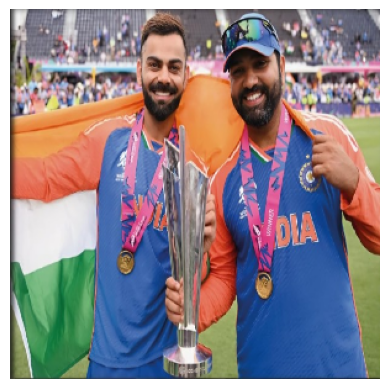

In [19]:
def resize_image(image, width=300, height=300):
    resized_image = cv2.resize(image, (width, height))
    return resized_image

# Define folder and image paths
folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000612381.jpg'
img_path = os.path.join(folder_path, image_name)

# Load the image
image = cv2.imread(img_path)
if image is None:
    print("Error: Image not loaded. Check the path or file permissions.")
else:
    # Resize the image
    resized_image = resize_image(image)
    
    # Display the resized image using matplotlib
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

### Blurring 

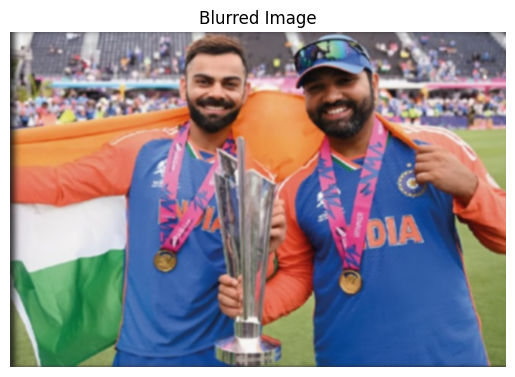

In [21]:
def blur_image(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000612381.jpg'
img_path = os.path.join(folder_path, image_name)

image = cv2.imread(img_path)
blurred_image = blur_image(image)

# Display blurred image using matplotlib
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Blurred Image")
plt.show()


### Grayscale Conversion

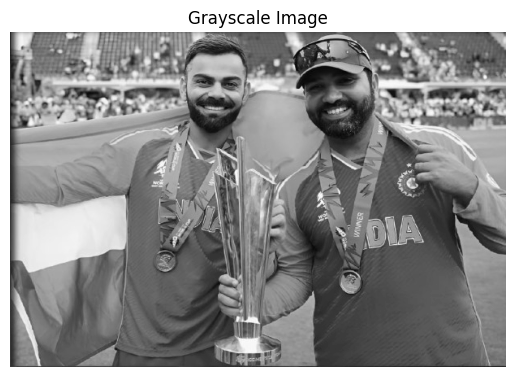

In [22]:
def convert_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Folder path and image name
folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000612381.jpg'
img_path = os.path.join(folder_path, image_name)

# Read the image
image = cv2.imread(img_path)

# Convert to grayscale
gray_image = convert_to_gray(image)

# Display grayscale image using matplotlib
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()

### Histogram Equalization

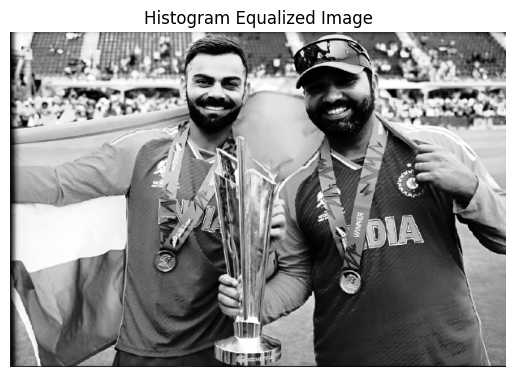

In [23]:
def equalize_histogram(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(gray_image)

folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000612381.jpg'
img_path = os.path.join(folder_path, image_name)

image = cv2.imread(img_path)
equalized_image = equalize_histogram(image)

# Display the histogram-equalized image using matplotlib
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title("Histogram Equalized Image")
plt.show()


### Edge Detection (Canny)

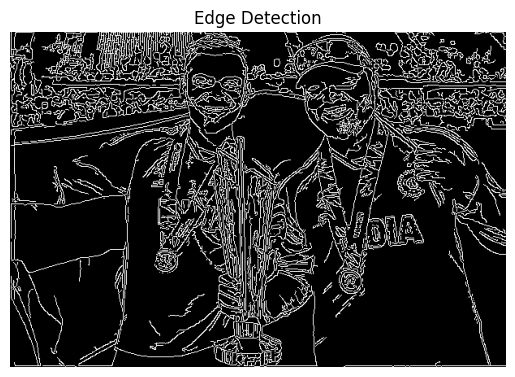

In [24]:
def detect_edges(image, low_threshold=50, high_threshold=150):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, low_threshold, high_threshold)
    return edges

folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000612381.jpg'
img_path = os.path.join(folder_path, image_name)

image = cv2.imread(img_path)
edges = detect_edges(image)

# Display the edges using matplotlib
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Edge Detection")
plt.show()


### Flip  90,180,270

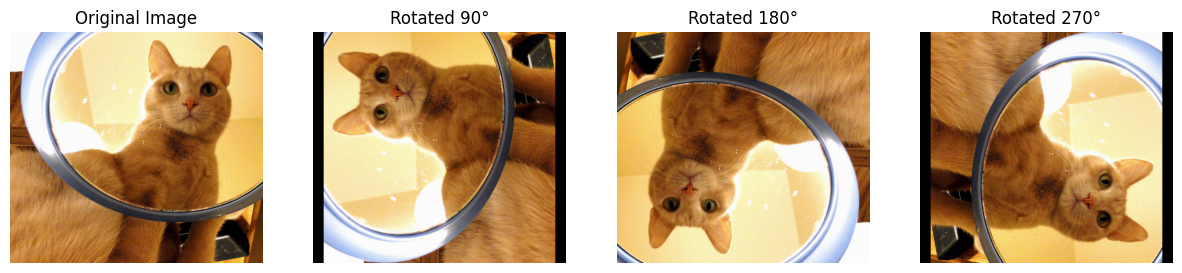

In [25]:
from PIL import Image
import matplotlib.pyplot as plt
import os

folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000063552.jpg'
img_path = os.path.join(folder_path, image_name)

image = Image.open(img_path)

# Rotate the image by 90°, 120°, 180°, and 270°
rotated_90 = image.rotate(90)
rotated_120 = image.rotate(120)
rotated_180 = image.rotate(180)
rotated_270 = image.rotate(270)  # Corrected here

# Display images in Jupyter
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display rotated 90° image
plt.subplot(1, 4, 2)
plt.imshow(rotated_90)
plt.title('Rotated 90°')
plt.axis('off')

# Display rotated 180° image
plt.subplot(1, 4, 3)
plt.imshow(rotated_180)
plt.title('Rotated 180°')
plt.axis('off')

# Display rotated 270° image
plt.subplot(1, 4, 4)
plt.imshow(rotated_270)
plt.title('Rotated 270°')
plt.axis('off')

plt.show()


### coco dataset anotations 

In [37]:
import os
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset

class CocoDataset(Dataset):
    def __init__(self, images, annotations, category_mapping, img_dir, transform=None):
        self.images = images
        self.annotations = annotations
        self.category_mapping = category_mapping
        self.img_dir = img_dir
        self.transform = transform
        self.image_id_to_annotations = self._group_annotations_by_image()

    def _group_annotations_by_image(self):
        image_id_to_annotations = {}
        for ann in self.annotations:
            image_id = ann['image_id']
            if image_id not in image_id_to_annotations:
                image_id_to_annotations[image_id] = []
            image_id_to_annotations[image_id].append(ann)
        return image_id_to_annotations

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_info = self.images[idx]
        img_path = os.path.join(self.img_dir, image_info['file_name'])
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        
        # Get annotations
        image_id = image_info['id']
        annotations = self.image_id_to_annotations.get(image_id, [])

        boxes = []
        labels = []
        for ann in annotations:
            # Assuming 'bbox' is the key that holds the coordinates
            x, y, width, height = ann['bbox']
            boxes.append([x, y, x + width, y + height])  # Convert bbox to [xmin, ymin, xmax, ymax]
            labels.append(ann['category_id'])  # Get category_id as the label

        # Convert boxes and labels to numpy arrays for transformations
        boxes = np.array(boxes)
        labels = np.array(labels)

        # Apply transformations (if any)
        if self.transform:
            transformed = self.transform(image=image, bboxes=boxes, labels=labels)
            image = transformed['image']
            boxes = transformed['bboxes']
            labels = transformed['labels']

        # Convert to PyTorch tensors
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)  # Change channel order to C x H x W
        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels}

        return image, target

In [43]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np

### Albumentations

In [14]:
import os
import cv2
import json
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader

# Define the CocoDataset class
class CocoDataset(Dataset):
    def __init__(self, image_directory, annotations_file, category_mapping, transform=None):
        self.image_directory = image_directory
        self.transform = transform
        self.category_mapping = category_mapping

        # Load the annotations from the COCO JSON file
        with open(annotations_file, 'r') as f:
            coco_data = json.load(f)

        self.images = coco_data['images']
        self.annotations = coco_data['annotations']
        self.categories = coco_data['categories']

        # Create a mapping of image_id to its annotations
        self.image_annotations = {}
        for annotation in self.annotations:
            image_id = annotation['image_id']
            if image_id not in self.image_annotations:
                self.image_annotations[image_id] = []
            self.image_annotations[image_id].append(annotation)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_info = self.images[idx]
        image_id = image_info['id']
        image_path = os.path.join(self.image_directory, image_info['file_name'])

        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image file not found: {image_path}")

        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Failed to load image: {image_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        bboxes = []
        category_labels = []
        if image_id in self.image_annotations:
            for annotation in self.image_annotations[image_id]:
                bbox = annotation['bbox']  # COCO bbox: [x, y, width, height]
                bbox[2] += bbox[0]  # Convert to Pascal VOC: [x_min, y_min, x_max, y_max]
                bbox[3] += bbox[1]
                bboxes.append(bbox)
                category_labels.append(self.category_mapping[annotation['category_id']])

        if self.transform:
            transformed = self.transform(image=image, bboxes=bboxes, category_labels=category_labels)
            image = transformed['image']
            bboxes = transformed['bboxes']

        return image, {'bboxes': bboxes, 'category_labels': category_labels}

# Define the augmentation pipeline
augmentation_pipeline = A.Compose([
    A.Resize(416, 416),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(p=0.25),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.Rotate(limit=25, p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.4),
    A.ToGray(p=0.15),
    A.CLAHE(p=0.2),
    A.RandomGamma(p=0.2),
    A.CoarseDropout(max_holes=8, max_height=32, max_width=32, min_holes=1, min_height=16, min_width=16, p=0.3),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_labels']))

# Define dataset paths
image_directory = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017-20241118T150821Z-001\val2017'
annotations_file = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\instances_val2017.json'

# Load COCO-style annotations
with open(annotations_file, 'r') as f:
    coco_data = json.load(f)

images = coco_data['images']  # List of image metadata
annotations = coco_data['annotations']  # List of annotations
categories = coco_data['categories']  # List of category metadata

# Create a category mapping
category_mapping = {cat['id']: cat['name'] for cat in categories}

# Create the dataset and DataLoader
dataset = CocoDataset(image_directory, annotations_file, category_mapping, transform=augmentation_pipeline)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True, collate_fn=lambda batch: tuple(zip(*batch)))

# Test data loading - limited output to 1 batch
images, targets = next(iter(data_loader))

# Output standard batch details
print(f"Images batch size: {len(images)}")
print(f"Sample image shape: {images[0].shape}")  # Print the shape of the first image in the batch
print(f"Target batch size: {len(targets)}")
print("Sample target:", targets[0])  # Print sample target (bounding boxes and labels)

Images batch size: 16
Sample image shape: torch.Size([3, 416, 416])
Target batch size: 16
Sample target: {'bboxes': [[163.22845458984375, 0.0, 189.24168395996094, 3.1161067485809326], [165.56422424316406, 164.2935333251953, 173.89553833007812, 170.93235778808594], [165.71063232421875, 162.0326690673828, 173.82777404785156, 168.1906280517578], [181.55892944335938, 155.38543701171875, 197.81983947753906, 176.13209533691406], [246.85008239746094, 0.0, 412.5384216308594, 196.40174865722656], [250.46177673339844, 232.11436462402344, 335.5095520019531, 384.3578796386719], [219.9512481689453, 199.50082397460938, 260.2458190917969, 284.42333984375], [169.92919921875, 0.0, 195.94241333007812, 31.77518653869629], [88.58084869384766, 91.01834869384766, 106.43854522705078, 123.6103286743164], [70.44020080566406, 170.89820861816406, 100.42822265625, 224.4836883544922], [219.5019989013672, 116.44239807128906, 340.90667724609375, 374.53875732421875], [197.01608276367188, 128.56626892089844, 268.67178

### Padding

In [49]:
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

class ImagePreprocessing:
    def __init__(self, target_height, target_width):
        self.target_height = target_height
        self.target_width = target_width
        
        # Define augmentation pipeline
        self.transform = A.Compose([
            A.Resize(self.target_height, self.target_width),
            A.RandomBrightnessContrast(p=0.3),
            A.GaussianBlur(p=0.25),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.2),
            A.Rotate(limit=25, p=0.5),
            A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.4),
            A.ToGray(p=0.15),
            A.CLAHE(p=0.2),
            A.RandomGamma(p=0.2),
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_labels']))
    
    def pad_image(self, image):
        h, w, _ = image.shape
        top = (self.target_height - h) // 2
        bottom = self.target_height - h - top
        left = (self.target_width - w) // 2
        right = self.target_width - w - left
        padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))
        return padded_image
    
    def preprocess(self, image, bboxes, category_labels):
        # Padding if image size is not the target size
        padded_image = self.pad_image(image)
        
        # Apply augmentations
        transformed = self.transform(image=padded_image, bboxes=bboxes, category_labels=category_labels)
        return transformed['image'], transformed['bboxes']

# Example usage
image_path = '000000010583.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Failed to load image at {image_path}")
else:
    bboxes = [[50, 60, 150, 200]]  # Example bounding boxes
    category_labels = [1]  # Example category labels

    preprocessor = ImagePreprocessing(target_height=416, target_width=416)
    image, bboxes = preprocessor.preprocess(image, bboxes, category_labels)

    cv2.imshow("Processed Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Failed to load image at 000000010583.jpg


## Model Training

In [3]:
import torch
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import DataLoader
from pycocotools.coco import COCO
from PIL import Image
import os

# Custom Dataset Class for COCO Annotations
class CocoDataset(torch.utils.data.Dataset):
    def __init__(self, images_path, annotations_file, transform=None):
        self.coco = COCO(annotations_file)
        self.images_path = images_path
        self.image_ids = list(self.coco.imgs.keys())
        self.transform = transform

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_id = self.image_ids[idx]
        annotations = self.coco.loadAnns(self.coco.getAnnIds(imgIds=img_id))
        
        # Load image
        img_path = os.path.join(self.images_path, self.coco.loadImgs(img_id)[0]['file_name'])
        img = Image.open(img_path).convert("RGB")
        
        if self.transform:
            img = self.transform(img)

        # Prepare bounding boxes and labels
        boxes = []
        labels = []
        for ann in annotations:
            bbox = ann['bbox']
            # Convert [x, y, width, height] to [x_min, y_min, x_max, y_max]
            boxes.append([bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]])
            labels.append(ann['category_id'])
        
        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64)
        }

        return img, target

# Define Paths
images_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017-20241118T150821Z-001\val2017'
annotations_file = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\instances_val2017.json'

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256))
])

# Dataset and DataLoader
dataset = CocoDataset(images_path, annotations_file, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Model Setup
num_classes = 91  # COCO dataset class count (80 classes + 1 background)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model = model.to(device)

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Training Loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for images, targets in dataloader:
        images = list(img.to(device) for img in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        
        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        
        losses.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# Save the Model
torch.save(model.state_dict(), "faster_rcnn_resnet50.pth")

model.eval()
test_image_path = os.path.join(images_path, "000000001993.jpg")
test_image = transform(Image.open(test_image_path).convert("RGB")).unsqueeze(0).to(device)

with torch.no_grad():
    prediction = model(test_image)
print(prediction)

loading annotations into memory...
Done (t=0.81s)
creating index...
index created!


AssertionError: Expected target boxes to be a tensor of shape [N, 4], got torch.Size([0]).

In [3]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import os

# Function to download and initialize the pre-trained Faster R-CNN model
def get_pretrained_faster_rcnn(num_classes):
    # Use weights instead of the deprecated `pretrained` parameter
    model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

# Transformations for the test image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256))
])

# Paths
test_image_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017-20241118T150821Z-001\val2017\000000001993.jpg'

# Model setup
num_classes = 91  # Number of classes (COCO dataset has 80 classes + background)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = get_pretrained_faster_rcnn(num_classes).to(device)

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Training loop
# Normally, you would use a dataset that provides actual targets (bounding boxes, labels)
# Dummy example
dummy_image = torch.rand((3, 256, 256))  # Dummy image
dummy_target = [{"boxes": torch.tensor([[50, 50, 200, 200]]).float().to(device),
                 "labels": torch.tensor([1]).to(device)}]  # Dummy bounding box and label

model.train()
for epoch in range(5):  # Reduced epochs for demonstration
    optimizer.zero_grad()
    loss_dict = model([dummy_image.to(device)], dummy_target)
    losses = sum(loss for loss in loss_dict.values())
    print(f"Epoch {epoch + 1}, Loss: {losses.item()}")
    losses.backward()
    optimizer.step()

# Save the trained model
torch.save(model.state_dict(), "faster_rcnn_resnet50.pth")

# Evaluate the model
model.eval()

# Test on a single image
test_image = transform(Image.open(test_image_path)).unsqueeze(0).to(device)

with torch.no_grad():
    prediction = model(test_image)

# Print prediction results
print(prediction)


Epoch 1, Loss: 4.509387016296387
Epoch 2, Loss: 1.7435417175292969
Epoch 3, Loss: 0.7026987671852112
Epoch 4, Loss: 0.6095196008682251
Epoch 5, Loss: 0.4929705262184143
[{'boxes': tensor([], size=(0, 4)), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([])}]
